In [ ]:
# library() # shows packages installed in Colab noteboook
install.packages("FNN", quiet=T)  # KNN Regression. Docs: https://cran.r-project.org/web/packages/FNN/FNN.pdf

In [ ]:
library(httr, quietly=T); library(crayon); library(stringr); library(FNN)
Competition = 'hse-ml-hw2-jan-17-movie-rating'
FileCSV = 'movie_rating_XY.csv'
FileZip = 'movie_rating_XY.zip'
capture.output( devtools::install_github("mkearney/kaggler"), file='log_kaggler_install.txt') # https://github.com/mkearney/kaggler
# capture.output( kaggler::kgl_auth(creds_file='kaggle.json'), file='log_auth.txt')     # log is deleted when session ends
url = paste0('https://www.kaggle.com/api/v1/competitions/data/download/', Competition,'/', FileCSV)
FileURL = httr::GET(url, kaggler::kgl_auth())$url   # extract full path to zipped data file
download.file(FileURL, FileZip, quiet=T, mode="wb") # download zipped data file
system(paste0('unzip ', FileZip), intern=T)         # oddly unzip() fails to properly unzip
kaggler::kgl_competitions_leaderboard_view(Competition)
timeLim = 60  # seconds


Installing 4 packages: vctrs, fansi, openssl, jsonlite

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "Archive:  movie_rating_XY.zip"        
[2] "  inflating: movie_rating_XY.csv     "

,teamNameNullable,scoreNullable,teamId,teamName,hasTeamName,submissionDate,score,hasScore
,<chr>,<chr>,<int>,<chr>,<lgl>,<chr>,<chr>,<lgl>
1,"IB-Ragnarök-Ivanushkina, Lukianov, Miniakhmetov",0.84013,8066204,"IB-Ragnarök-Ivanushkina, Lukianov, Miniakhmetov",TRUE,2022-01-30T14:52:34.6333333Z,0.84013,TRUE
2,"DU-MRS-Ruban, Mozharov, Sharara",0.96076,8049061,"DU-MRS-Ruban, Mozharov, Sharara",TRUE,2022-01-30T16:04:18.4766667Z,0.96076,TRUE
3,"DM-TeaM-Fayzulina,Omarova,Kotukhov",0.96646,8076878,"DM-TeaM-Fayzulina,Omarova,Kotukhov",TRUE,2022-01-30T14:08:56.8166667Z,0.96646,TRUE
4,"DF-TarantinoEnjoyers-Egorov, Vasiliev, Bashminova",0.96770,8078806,"DF-TarantinoEnjoyers-Egorov, Vasiliev, Bashminova",TRUE,2022-01-30T16:58:34.5466667Z,0.96770,TRUE
5,"DD-NB-Xu,Poletaev,Madhavan",0.97641,8074927,"DD-NB-Xu,Poletaev,Madhavan",TRUE,2022-01-30T19:04:03.8433333Z,0.97641,TRUE
6,"DI-Dickens-Sokolov,Alyakaev,Vasyutin",0.97792,8078918,"DI-Dickens-Sokolov,Alyakaev,Vasyutin",TRUE,2022-01-30T20:25:08.2866667Z,0.97792,TRUE
7,"IA-Oscars-Adshead,Odnakov,Blanutsa",0.97796,8061964,"IA-Oscars-Adshead,Odnakov,Blanutsa",TRUE,2022-01-30T20:48:20.4433333Z,0.97796,TRUE
8,"DJ-ObaDva-Korzun,Kurbatov",0.97960,8079370,"DJ-ObaDva-Korzun,Kurbatov",TRUE,2022-01-30T20:03:10.3666667Z,0.97960,TRUE
9,"DK-Spartak-Fishman, Markevich, Karcha",0.98607,8078886,"DK-Spartak-Fishman, Markevich, Karcha",TRUE,2022-01-30T13:24:53.75Z,0.98607,TRUE


**A Brief EDA**: Below we load the CSV file and display a few rows from each dataframe, test and train. Notice the textual and categorical fields.

In [ ]:
XY = read.csv('movie_rating_XY.csv') 
NumericCols =  unlist(lapply(XY, is.numeric))   # find numeric columns
vX = XY[is.na(XY$voteAvg), !(names(XY) %in% c('voteAvg'))]  # testing inputs only
tXY = XY[!is.na(XY$voteAvg), ]    # training inputs with output voteAvg
tY = tXY['voteAvg']               # training response
tX = tXY[,-1]                     # training inputs without response
vX[str_length(vX$desc) < 30,]     # display a few rows from the test set, with short movie descriptions
tXY[str_length(tXY$desc) < 30,]   # display a few rows from the training set, with short movie descriptions

,voteCnt,popularity,duration,income,budget,releaseDate,Action,Adventure,Animation,Comedy,⋯,Western,origLang,spokenLang,ttl,kwds,desc,prodComp,prodCtry,tagline,hasURL
,<int>,<dbl>,<int>,<dbl>,<int>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
504,7,0.850103,78,0,969000,2014-05-22,0,0,0,0,⋯,0,de,en,fооd сhаins,,nаn,,,nаn,0
1482,11,0.682989,0,0,13503000,2015-12-13,0,0,0,0,⋯,0,it,es,сhiаmаtemi frаnсesсо - il рара dellа gente,"biоgrарhу,рорe",nаn,tаоdue film,it,nаn,0
2170,2,0.020014,88,0,0,2005-01-09,1,0,0,1,⋯,0,en,en,heliх... lоаded,,,,us,nаn,0


,voteAvg,voteCnt,popularity,duration,income,budget,releaseDate,Action,Adventure,Animation,⋯,Western,origLang,spokenLang,ttl,kwds,desc,prodComp,prodCtry,tagline,hasURL
,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<chr>,<int>,<int>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
3086,0,0,0.017351,88,0,293000,2014-12-22,1,0,0,⋯,0,en,en,аmidst devil`s wings,,"рrequel tо ""5th оf degree.""",,us,"рrequel tо ""5th оf degree.""",0
3755,0,0,0.007078,0,0,0,2007-12-25,0,0,0,⋯,0,en,,hаrrisоn mоntgоmerу,,film frоm dаniel dаvilа,,,nаn,0
4660,0,0,0.053192,0,0,0,2016-01-06,0,0,0,⋯,0,en,,"tо be frаnk, sinаtrа аt 100","асtоrs,сlаssiс hоllуwооd,frаnk sinаtrа,legendаrу рerfоmer,musiс,singers",nаn,eуeline entertаinment,gb,nаn,0


Next assess the correlations (i.e. the degree of **linear** dependence) between features and **y**. 

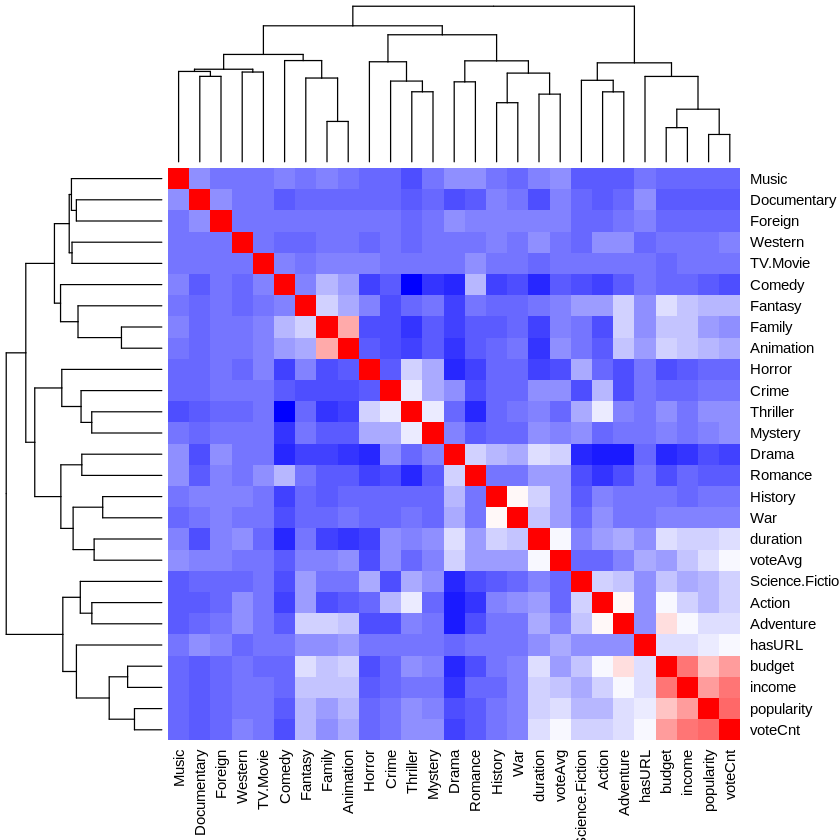

In [ ]:
Corr = cor(tXY[,NumericCols])
heatmap(x=Corr, symm=T, col=colorRampPalette(c("blue", "white", "red"))(40))

Next, assess the existence of **non-linear** dependence between features and the target.

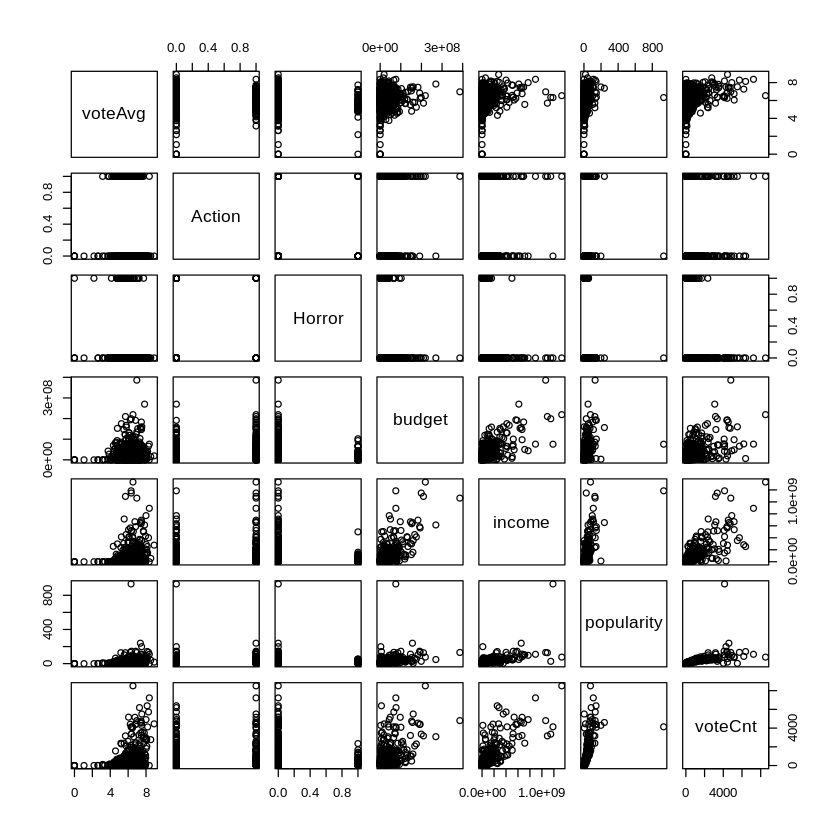

In [ ]:
pairs(tXY[1:500, c('voteAvg','Action','Horror','budget', 'income', 'popularity', 'voteCnt')])  # scatter plot matrix for selected features

In [ ]:
t0 = Sys.time()

In the simple model below we use some predictors, which exhibit +/- correlation with `y`.

<hr color=red>

<font size=5>⏳</font> <strong><font color=orange size=5>Your Code, Documentation, Ideas and Timer - All Start Here...</font></strong>

Students: Keep all your definitions, code, documentation **between** ⏳ symbols.

## **Task 1. Preprocessing Pipeline**
 
Explain elements of your preprocessing pipeline i.e. feature engineering, subsampling, clustering, dimensionality reduction, etc. 
1. Why did you choose these elements? (Something in EDA, prior experience,...? Btw, EDA is not required)
1. How do you evaluate the effectiveness of these elements? 
1. What else have you tried that worked or didn't? 

**Student's answer:**

## **Task 2. Modeling Approach**
Explain your modeling approach, i.e. ideas you tried and why you thought they would be helpful. 

1. How did these decisions guide you in modeling?
1. How do you evaluate the effectiveness of these elements? 
1. What else have you tried that worked or didn't? 

**Student's answer:**

In [ ]:
NumerciCols = unlist(lapply(tX, is.numeric))   # find numeric column names
m = knn.reg(tX[NumerciCols], vX[NumerciCols], tY, k=3)
vY = setNames(data.frame(m$pred), 'y')

In [ ]:
write.csv(cbind(id=1:nrow(vY), vY), file='MySubmission.csv', row.names=F)  # write to CSV file

<font size=5>⌛</font> <strong><font color=orange size=5>Do not exceed competition's runtime limit!</font></strong>

<hr color=red>


In [ ]:
RunTime = round(difftime(Sys.time(), t0, units = "secs")[[1]])
msg = paste0('Runtime is ',RunTime,' sec. Time limit is ', timeLim, ' sec')
cat(ifelse(timeLim<RunTime, bold(red(paste0('Limit exceeded!!! ', msg))), msg))

Runtime is 0 sec. Time limit is 60 sec

## 💡**Starter Ideas**

1. Tune model hyperparameters
1. Try to linear and non-linear feature normalization: shift/scale, log, divide features by features
1. Try feature interactions, polynomial features
1. Do a thorough EDA and understand non-linear relation in I/O
1. Try grouping similar genres to reduce dimensionality
1. Try dimension reduction (if number of featues grows too large). See [`stats::prcomp()`](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/prcomp)